# **Project 3 Report**

Taylor Boyd

CS458

## **P3-1. Revisit Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space'].**

In [66]:
from sklearn.datasets import fetch_20newsgroups

cats = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=cats)

**(b) Build classifiers using the following methods: SVM, Naive Bayes Classifiers, K-nearest neighbors, Random forest, AdaBoost classifer.**

In [94]:
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

# SVM classifier
lin_clf = svm.LinearSVC()
pred = lin_clf.fit(vectors, newsgroups_train.target).predict(vectors_test)
svm_f1 = metrics.f1_score(newsgroups_test.target, pred, average='macro')
print("SVM Classification Accuracy: ", svm_f1)

# Optimized SVM classifier
lin_clf2 = svm.LinearSVC(class_weight='balanced', loss='hinge', max_iter=1500)
pred2 = lin_clf2.fit(vectors, newsgroups_train.target).predict(vectors_test)
svm_f12 = metrics.f1_score(newsgroups_test.target, pred2, average='macro')
print("Optimized SVM Classification Accuracy: ", svm_f12)
print("")

# Naive Bayes Classifier
gnb = MultinomialNB()
gnb_pred = gnb.fit(vectors, newsgroups_train.target).predict(vectors_test)
gnb_f1 = metrics.f1_score(newsgroups_test.target, gnb_pred, average='macro')
print("Naive Bayes Classification Accuracy: ", gnb_f1)

# Optimized Naive Bayes Classifier
gnb2 = MultinomialNB(alpha=0.1)
gnb_pred2 = gnb2.fit(vectors, newsgroups_train.target).predict(vectors_test)
gnb_f12 = metrics.f1_score(newsgroups_test.target, gnb_pred2, average='macro')
print("Optimized Naive Bayes Classification Accuracy: ", gnb_f12)
print("")

# K-nearest neighbors
neigh = KNeighborsClassifier()
knn_pred = neigh.fit(vectors, newsgroups_train.target).predict(vectors_test)
knn_f1 = metrics.f1_score(newsgroups_test.target, knn_pred, average='macro')
print("KNN Classification Accuracy: ", knn_f1)

# Optimized K-nearest neighbors
neigh2 = KNeighborsClassifier(n_neighbors=4)
knn_pred2 = neigh2.fit(vectors, newsgroups_train.target).predict(vectors_test)
knn_f12 = metrics.f1_score(newsgroups_test.target, knn_pred2, average='macro')
print("Optimized KNN Classification Accuracy: ", knn_f12)
print("")

# Random forest
rf = RandomForestClassifier()
rf_pred = rf.fit(vectors, newsgroups_train.target).predict(vectors_test)
rf_f1 = metrics.f1_score(newsgroups_test.target, rf_pred, average='macro')
print("Random Forest Classification Accuracy: ", rf_f1)

# Optimized Random forest
rf2 = RandomForestClassifier(min_samples_split=3, random_state=0, class_weight='balanced')
rf_pred2 = rf2.fit(vectors, newsgroups_train.target).predict(vectors_test)
rf_f12 = metrics.f1_score(newsgroups_test.target, rf_pred2, average='macro')
print("Optimized Random Forest Classification Accuracy: ", rf_f12)
print("")

# AdaBoost
ada = AdaBoostClassifier()
ada_pred = ada.fit(vectors, newsgroups_train.target).predict(vectors_test)
ada_f1 = metrics.f1_score(newsgroups_test.target, ada_pred, average='macro')
print("AdaBoost Classification Accuracy: ", ada_f1)

# Optimized AdaBoost
ada2 = AdaBoostClassifier(n_estimators=80, random_state=0)
ada_pred2 = ada2.fit(vectors, newsgroups_train.target).predict(vectors_test)
ada_f12 = metrics.f1_score(newsgroups_test.target, ada_pred2, average='macro')
print("Optimized AdaBoost Classification Accuracy: ", ada_f12)

SVM Classification Accuracy:  0.8635790597805155
Optimized SVM Classification Accuracy:  0.8688061724285545

Naive Bayes Classification Accuracy:  0.7675014490709844
Optimized Naive Bayes Classification Accuracy:  0.8789644066827152

KNN Classification Accuracy:  0.2451520824225349
Optimized KNN Classification Accuracy:  0.2699621029571755

Random Forest Classification Accuracy:  0.7706075471470509
Optimized Random Forest Classification Accuracy:  0.7777885649043983

AdaBoost Classification Accuracy:  0.6845786110798553
Optimized AdaBoost Classification Accuracy:  0.6866444938596248


There was an improvement to the SVM classifier due to an increased max_iter, change of loss to hinge and class_weight to balanced. There was a significant improvement to the Naive Bayes Classifier due to lowering alpha from 1 to 0.1. There was an improvement to the KNN classifier due to changing n_neighbors from default 5 to 4. There was an improvement to the Random Forest classifier due to changing min_sample_split to 3, random_state to 0, and class_weight to balanced. There was an improvement to the AdaBoost classifier due to a change in n_estimators from 50 to 80 and random_state was set to 0.

## **P3-2. Recognizing hand-written digits**

**(a) Develop a multi-layer perceptron classifier to recognize images of hand-written digits.**

0.9299221357063404


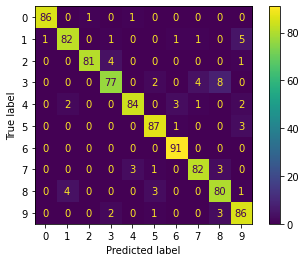

In [33]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

clf = MLPClassifier().fit(X_train, y_train)
print(clf.score(X_test, y_test))

#display confusion matrix
metrics.plot_confusion_matrix(clf, X_test, y_test)

**(b) Optimize the hyperparameters of your neural network to maximize the classification accuracy.**

0.9521690767519466
0.9688542825361512


Text(0.5, 0.98, 'Confusion Matrix')

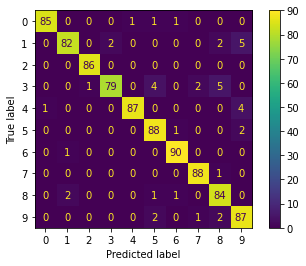

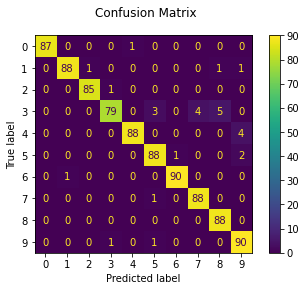

In [64]:
from sklearn import metrics, svm

# MLP classifier with optimized hyperparameters
clf2 = MLPClassifier(max_iter=280, hidden_layer_sizes=400).fit(X_train, y_train)
print(clf2.score(X_test, y_test))

# display confusion matrix
metrics.plot_confusion_matrix(clf2, X_test, y_test)

# support vector classifier
classifier = svm.SVC(gamma=0.001)
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

By changing the max_iter hyperparameter from default to 280 iterations, there was a clear improvement in the f1 score as well as the True positives and False negatives shown in the confusion matrices. Same goes with changing the hidden_layer_sizes from the default 100 to 400. The final MLP classifier ended up being quite close in accuracy to the support vector classifier.

## **P3-3. Nonlinear Support Vector Machine**

**(a) Randomly generate the 2-class data points.**

In [3]:
import numpy as np

np.random.seed(0)
X = np.random.rand(300,2)*10-5
Y = np.logical_xor(X[:,0]>0,X[:,1]>0)

Pipeline(steps=[('standardscaler', StandardScaler()), ('nusvc', NuSVC())])

**(b) Develop a nonlinear SVM binary classifier.**

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC

clf = make_pipeline(StandardScaler(), NuSVC(kernel='poly', degree=2))
clf.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('nusvc', NuSVC(degree=2, kernel='poly'))])

**(c) Plot these data points and the corresponding decision boundaries, which is similar to the figure in the slide 131 in Chapter 4.**

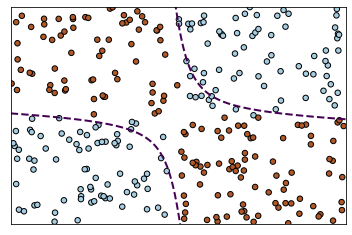

In [15]:
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-5, 5, 500),
                     np.linspace(-5, 5, 500))

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-5, 5, -5, 5])
plt.show()